In [6]:
import yfinance as yf 
import pandas as pd

# user input 
symbol = input("Enter Stock Symbol: ").upper()

# Download option chain from yahoo finance
stock = yf.Ticker(symbol)
expirations = stock.options
chosen_exp = expirations[0]

# Get Calls and Puts Options
calls = stock.option_chain(chosen_exp).calls
puts = stock.option_chain(chosen_exp).puts

# Add option type
calls['type'] = 'call'
puts['type'] = 'put'

# combine and clean
options = pd.concat([calls, puts])
options = options[['strike', 'lastPrice', 'impliedVolatility', 'inTheMoney', 'type']]
options = options.dropna()
options = options[options['impliedVolatility'] < 1.0 ]

print(options.head)

<bound method NDFrame.head of     strike  lastPrice  impliedVolatility  inTheMoney  type
17   185.0      10.90           0.724612        True  call
18   187.5       9.00           0.629887        True  call
19   190.0       5.95           0.503911        True  call
20   192.5       3.54           0.613773        True  call
21   195.0       1.14           0.209481        True  call
22   197.5       0.01           0.058603       False  call
23   200.0       0.01           0.160165       False  call
24   202.5       0.01           0.250007       False  call
25   205.0       0.01           0.343757       False  call
26   207.5       0.01           0.421881       False  call
27   210.0       0.01           0.500005       False  call
28   212.5       0.01           0.546880       False  call
29   215.0       0.01           0.625004       False  call
30   217.5       0.01           0.687503       False  call
31   220.0       0.01           0.750003       False  call
32   222.5       0.01     

In [7]:
# Display 
print(options.head())

    strike  lastPrice  impliedVolatility  inTheMoney  type
17   185.0      10.90           0.724612        True  call
18   187.5       9.00           0.629887        True  call
19   190.0       5.95           0.503911        True  call
20   192.5       3.54           0.613773        True  call
21   195.0       1.14           0.209481        True  call


I have to preprocess for clustering before apply it into KMeans Clustering

In [8]:
# Preprocess for Clustering
from sklearn.preprocessing import StandardScaler

# Encode call/put as 0/1
options['type'] = options['type'].map({'call': 0, 'put':1})

# Features 
X = options[['strike', 'lastPrice', 'impliedVolatility', 'type']].values

#scaler features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [9]:
# Apply KMeans Clustering 
from sklearn.cluster import KMeans

# Fit model with 3 clusters
KMeans = KMeans(n_clusters=3, random_state=42)
options['cluster'] = KMeans.fit_predict(x_scaled)

# View sample
print(options.head())

    strike  lastPrice  impliedVolatility  inTheMoney  type  cluster
17   185.0      10.90           0.724612        True     0        2
18   187.5       9.00           0.629887        True     0        2
19   190.0       5.95           0.503911        True     0        2
20   192.5       3.54           0.613773        True     0        0
21   195.0       1.14           0.209481        True     0        0


c:\Users\juanm\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\juanm\miniconda3\envs\ml\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\juanm\miniconda3\envs\ml\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
c

<function matplotlib.pyplot.show(close=None, block=None)>

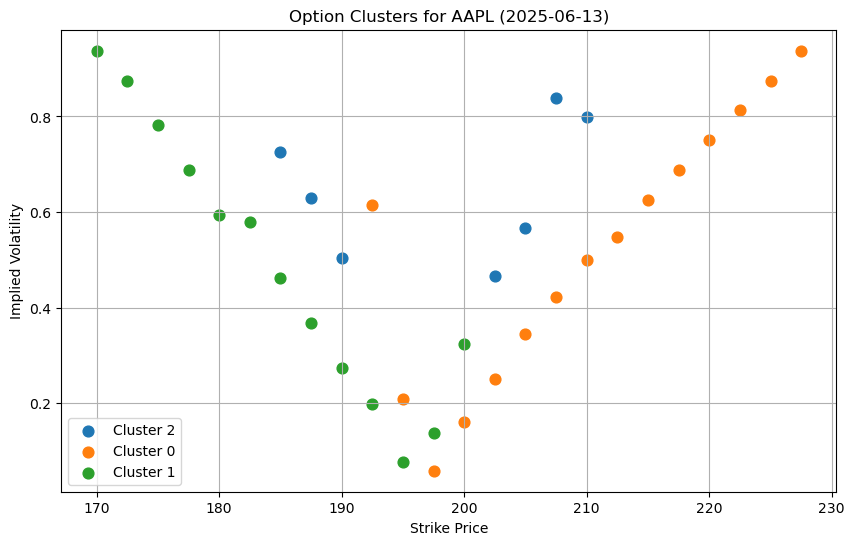

In [10]:
import matplotlib.pyplot as plt

# Plot Strike vs IV, color by cluster
plt.figure(figsize=(10,6))
for c in options['cluster'].unique():
    subset = options[options['cluster'] == c]
    plt.scatter(subset['strike'], subset['impliedVolatility'], label = f'Cluster {c}', s = 60)

plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title(f"Option Clusters for {symbol} ({chosen_exp})")
plt.legend()
plt.grid(True)
plt.show

